## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results,how = 'left', on="Mouse ID")
mouse_study2 = mouse_study[(mouse_study['Drug Regimen']  == "Capomulin")|(mouse_study['Drug Regimen']  == 'Infubinol')|(mouse_study['Drug Regimen']  == 'Ketapril') |(mouse_study['Drug Regimen']  == 'Placebo')]


In [3]:
# Display the data table for preview
mouse_study2.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse_id = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_results = study_results[study_results['Mouse ID'].isin(dup_mouse_id)==False]
clean_mouse_study2 = mouse_study2[mouse_study2['Mouse ID'].isin(dup_mouse_id)==False]

#combine the dataframes using Mouse ID
combined_data = pd.merge(clean_study_results, clean_mouse_study2, on = "Mouse ID")

In [6]:
# Display clean data
combined_data.head()


,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,b128,0,45.0,0,Capomulin,Female,9,22,0,45.000000,0
1,b128,0,45.0,0,Capomulin,Female,9,22,5,45.651331,0
2,b128,0,45.0,0,Capomulin,Female,9,22,10,43.270852,0
3,b128,0,45.0,0,Capomulin,Female,9,22,15,43.784893,0
4,b128,0,45.0,0,Capomulin,Female,9,22,20,42.731552,0


## Summary Statistics

In [7]:
#Creates Summary Table with Drug Regimen
summary_data = pd.DataFrame(combined_data.groupby("Drug Regimen").count())

#Use groupby to create summary data and add results into columns
summary_data["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)_y"].mean())
summary_data["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)_y"].median())
summary_data["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)_y"].std())
summary_data["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)_y"].var())
summary_data["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)_y"].sem())

#Clean up columns
summary_data = summary_data[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

#Rename count column
summary_data = summary_data.rename(columns = {"Mouse ID" : "Trials"})

#Print data
summary_data.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,2214,40.642199,41.534097,4.986119,24.861380,0.105968
Infubinol,1472,53.634713,52.777870,6.599470,43.553000,0.172011
Ketapril,1670,55.873466,54.789768,8.296114,68.825509,0.203010
Placebo,1533,54.800399,52.818634,7.956550,63.306682,0.203214


## Bar and Pie Charts

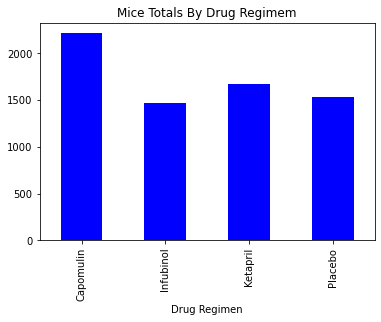

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Filter the DataFrame
trt_mice = summary_data[["Trials"]]

# Use DataFrame.plot() in order to create a bar chart of the data
trt_mice.plot(kind="bar", figsize=(6,4), color = "b", legend=False)

# Give Chart a Title
plt.title("Mice Totals By Drug Regimem")

#Print Chart
plt.show()
plt.tight_layout()


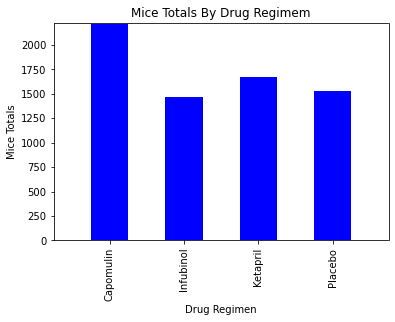

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(trt_mice))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure s
plt.figure(figsize=(6,4))
plt.bar(x_axis, trt_mice["Trials"], color = "b", width = .5)
plt.xticks(tick_locations, trt_mice.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(trt_mice["Trials"])+10)

# Give Chart Title and Labels
plt.title("Mice Totals By Drug Regimem")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Totals")


#Print Chart
plt.show()

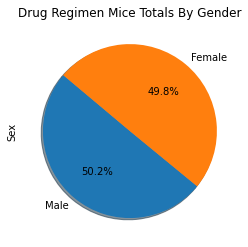

Male      3456
Female    3433
Name: Sex, dtype: int64

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Figure out number of male vs. female
gender_count = combined_data['Sex'].value_counts()

# Use DataFrame.plot() To Create Pie Chart
gender_count.plot(kind="pie", labels=gender_count.index.values,
        autopct="%1.1f%%", shadow=True, startangle=140, subplots=True,legend=False)

# Set a title for the chart
plt.title("Drug Regimen Mice Totals By Gender")

#Print Chart
plt.show()
gender_count

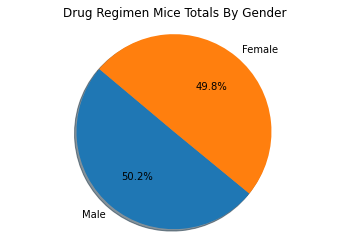

Male      3456
Female    3433
Name: Sex, dtype: int64

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Creating Pie Chart
plt.pie(gender_count, labels=gender_count.index.values,
        autopct="%1.1f%%", shadow=True, startangle=140)

#Set axis to equal so it creates a ciricle
plt.axis("equal")

# Give Title
plt.title("Drug Regimen Mice Totals By Gender")

# Print Chart
plt.show()
gender_count

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin

# Filter Data
filter_data = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") | (combined_data["Drug Regimen"] == "Ramicane") | (combined_data["Drug Regimen"] == "Ceftamin") | (combined_data["Drug Regimen"] == "Infubinol"), :]

# Sort Data By Timpepoints 
filter_data = filter_data.sort_values("Timepoint_y", ascending = False)

# Drop duplicates
filter_data = filter_data.drop_duplicates(subset="Mouse ID", keep='first')

In [36]:
# Determine quartiles
quartiles = filter_data['Tumor Volume (mm3)_y'].quantile([.25,.5,.75])
L_Q = quartiles[0.25]
U_Q = quartiles[0.75]
iqr = U_Q-L_Q

# Determine upper and lower bounds
L_bound = L_Q - (1.5*iqr)
U_bound = U_Q + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers = filter_data.loc[(filter_data['Tumor Volume (mm3)_y'] > U_bound) | (filter_data['Tumor Volume (mm3)_y'] < L_bound), :]
outliers
    

,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y


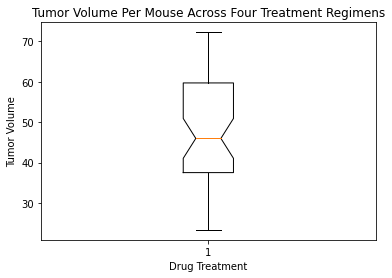

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Tumor_Volume = filter_data['Tumor Volume (mm3)_y']
regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Per Mouse Across Four Treatment Regimens')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel("Drug Treatment")

ax1.boxplot(Tumor_Volume, regimens)
plt.show()

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])


## Line and Scatter Plots

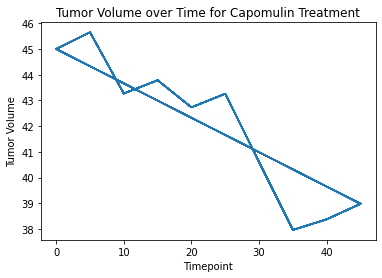

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Filter Data
mouse_cap = combined_data[combined_data["Mouse ID"].isin(["b128"])]
trt_cap = mouse_cap[["Mouse ID", "Timepoint_y", "Tumor Volume (mm3)_y"]]

#Set Varibles
timepoint = trt_cap["Timepoint_y"]
t_vol = trt_cap["Tumor Volume (mm3)_y"]

# Plot the tumor volume
t_vol_line = plt.plot(timepoint, t_vol)

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Treatment')
plt.show()


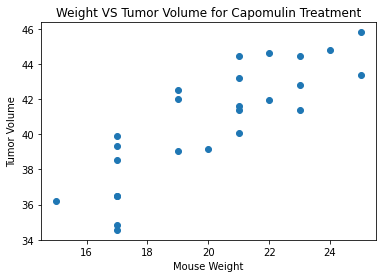

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Pull values for plot
mouse_weight = trt_cap.groupby(trt_cap["Mouse ID"])["Weight (g)"].mean()
tumor_vol = trt_cap.groupby(trt_cap["Mouse ID"])["Tumor Volume (mm3)_y"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_vol)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight VS Tumor Volume for Capomulin Treatment")
plt.show()


## Correlation and Regression

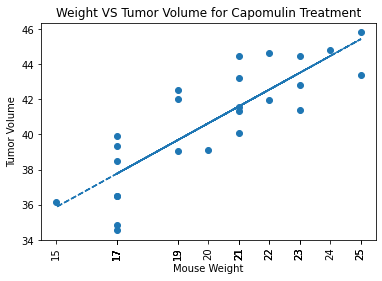

The correlation between weight and tumor value is 0.84


In [29]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Pull values
mouse_weight = trt_cap.groupby(trt_cap["Mouse ID"])["Weight (g)"].mean()
tumor_vol = trt_cap.groupby(trt_cap["Mouse ID"])["Tumor Volume (mm3)_y"].mean()

# Linear regression
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_vol)
      
# Create equation of line
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_vol)
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight VS Tumor Volume for Capomulin Treatment")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_vol)[0],2)
print(f'The correlation between weight and tumor value is {corr}')